In [7]:


%matplotlib inline
# https://medium.com/analytics-vidhya/signal-data-processing-for-scientific-data-analysis-with-python-part-1-90a90cb7f81

plt.rcParams["font.size"] = 16
plt.rcParams['figure.figsize'] = (20, 10)

# mean series filter

sigRate = 1000 #Hz
time = np.arange(0,3, 1/sigRate)
n = len(time)
p = 15 #poles for random interpolation
ampl = np.interp(np.linspace(0,p,n),np.arange(0,p),np.random.rand(p)*30)
fig1, axs = plt.subplots(3, 1)
ax1 =  axs[0]
ax2 =  axs[1]
ax3 =  axs[2]
ax1.plot(time, ampl)
noiseamp = 5
noise = noiseamp*np.random.randn(n)
signal = ampl + noise

#ax1.plot(time, ampl)
ax1.plot(time, signal)
ax1.grid()

#initializing
filtSig = np.zeros(n)
k = 15
for i in range(k,n-k-1):
    # each point is the average of k surrounding points
    filtSig[i] = np.mean(signal[i-k:i+k])
ax2.plot(time, filtSig)
ax2.grid('on')

#initializing
filtSig = np.zeros(n)
#filtSig = map(lambda i : np.mean(signal[i-k:i+k], signal))for k in range(10,20):
for k in range(10,20):
    for i in range(k,n-k-1):
        filtSig[i] = np.mean(signal[i-k:i+k])

    ax3.plot(time, signal, marker='o', alpha=0.01)
ax3.grid('on')

In [ ]:
# https://medium.com/analytics-vidhya/signal-processing-time-series-analysis-for-scientific-data-analysis-with-python-part-2-bd263fdf8196

fig1, axs = plt.subplots(3, 1)
ax1 =  axs[0]
ax2 =  axs[1]
ax3 =  axs[2]
sigRate = 48000 #Hz
time = np.arange(0,3, 1/sigRate)
n = len(time)
p = 15 #poles for random interpolation
ampl = np.interp(np.linspace(0,p,n),
                 np.arange(0,p),
                 np.random.rand(p)*30)
noiseamp = 5
noise = noiseamp*np.random.randn(n)
signal = ampl + noise


fwhm = 25 # in ms
k = 700
gauss_time = 2000*np.arange(-k,k)/sigRate# create Gaussian window
gauss_win = np.exp( -(4*np.log(2)*gauss_time**2) / fwhm**2 )


ax1.plot(time, ampl, 'ro-', markersize = 5)
ax1.plot(time, signal, alpha=0.5)
ax1.grid()

ax2.plot(gauss_time,gauss_win)

# Another consideration here is to calculate the empirical FWHM. As the gauss_time depends on sampling rate, the empirical FWHM is never exactly same as our assigned value. Notice that even though we have specified FWHM to be 25 the empirical number turned out to be 26 in my case.
pstPeakHalf = k + np.argmin( (gauss_win[k:]-.5)**2 )
prePeakHalf = np.argmin( (gauss_win-.5)**2 )
empFWHM = gauss_time[pstPeakHalf] - gauss_time[prePeakHalf]
print(empFWHM)


# initialize filtered signal vector
filtSig_Gauss = np.zeros(n)# # implement the running mean filter
for i in range(k+1,n-k-1):
    # each point is the weighted average of k surrounding points
    filtSig_Gauss[i] = np.sum( signal[i-k:i+k]*gauss_win )

ax3.plot(time,k*signal,'r',label='Original')
ax3.plot(time,filtSig_Gauss,'k',label='Gaussian-filtered')
ax3.set_xlabel('Time (s)')
ax3.set_ylabel('amp. (a.u.)')
#ax3.set_xlim(left=0.02, right=2.98)
ax3.legend()
ax3.set_title('Gaussian smoothing filter')

In [ ]:
import scipy.signal as signal
# Read WAV and MP3 files to array
# https://hackernoon.com/audio-handling-basics-how-to-process-audio-files-using-python-cli-jo283u3y
from pydub import AudioSegment
import numpy as np
from scipy.io import wavfile
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
import plotly

# Fix-sized segmentation (breaks a signal into non-overlapping segments)
fs, signal = wavfile.read("audio_for_test.wav")
signal = signal / (2**15)
signal_len = len(signal)
segment_size_t = 1 # segment size in seconds
segment_size = segment_size_t * fs  # segment size in samples
# Break signal into list of segments in a single-line Python code
segments = np.array([signal[x:x + segment_size] for x in
                     np.arange(0, signal_len, segment_size)])
# Save each segment in a seperate filename
#for iS, s in enumerate(segments):
  #  wavfile.write("data/obama_segment_{0:d}_{1:d}.wav".format(segment_size_t * iS,
     #                                                         segment_size_t * (iS + 1)), fs, (s))

import IPython
import IPython
# Remove pauses using an energy threshold = 50% of the median energy:
energies = [(s**2).sum() / len(s) for s in segments]
# (attention: integer overflow would occure without normalization here!)
thres = 0.9 * np.median(energies)
index_of_segments_to_keep = (np.where(energies > thres)[0])
# get segments that have energies higher than a the threshold:
segments2 = segments[index_of_segments_to_keep]
# concatenate segments to signal:
new_signal = np.concatenate(segments2)
# and write to file:
wavfile.write("obama_processed.wav", fs, new_signal)
plotly.offline.iplot({ "data": [go.Scatter(y=energies, name="energy"),
                                go.Scatter(y=np.ones(len(energies)) * thres,
                                           name="thres")]})


# play the initial and the generated files in notebook:
#IPython.display.display(IPython.display.Audio("data/obama.wav"))
IPython.display.display(IPython.display.Audio("obama_processed.wav"))



In [ ]:
import numpy as np
import scipy.io.wavfile as wavfile
import librosa
import IPython
# load file and extract tempo and beats:
[Fs, s] = wavfile.read('audio_for_test.wav')
tempo, beats = librosa.beat.beat_track(y=s.astype('float'), sr=Fs, units="time")
beats -= 0.05
# add small 220Hz sounds on the 2nd channel of the song ON EACH BEAT
s = s.reshape(-1, 1)
s = np.array(np.concatenate((s, np.zeros(s.shape)), axis=1))
for ib, b in enumerate(beats):
    t = np.arange(0, 0.2, 1.0 / Fs)
    amp_mod = 0.2 / (np.sqrt(t)+0.2) - 0.2
    amp_mod[amp_mod < 0] = 0
    x = s.max() * np.cos(2 * np.pi * t * 220) * amp_mod
    s[int(Fs * b):
      int(Fs * b) + int(x.shape[0]), 1] = x.astype('int16')
# write a wav file where the 2nd channel has the estimated tempo:
wavfile.write("music_44100_with_tempo.wav", Fs, np.int16(s))
# play the generated file in notebook:
IPython.display.display(IPython.display.Audio("music_44100_with_tempo.wav"))



Column
    [0] Column
        [0] IntSlider(end=90, name='window', start=-30, value=30)
        [1] IntSlider(end=30, name='sigma', start=-10, value=10)
    [1] Row
        [0] Matplotlib(Figure, name='interactive00160')
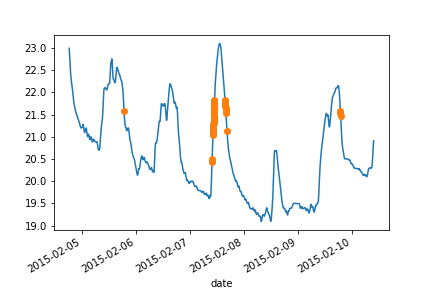

In [8]:
import pandas as pd; import numpy as np; import matplotlib.pyplot as plt

data = pd.read_csv('https://raw.githubusercontent.com/holoviz/panel/master/examples/assets/occupancy.csv')
data['date'] = data.date.astype('datetime64[ns]')
data = data.set_index('date')

data.tail()


from matplotlib.figure import Figure
from matplotlib.backends.backend_agg import FigureCanvas

%matplotlib inline

def mpl_plot(avg, highlight):
    fig = Figure()
    FigureCanvas(fig) # not needed in mpl >= 3.1
    ax = fig.add_subplot()
    avg.plot(ax=ax)
    if len(highlight): highlight.plot(style='o', ax=ax)
    return fig

def find_outliers(variable='Temperature', window=30, sigma=10, view_fn=mpl_plot):
    avg = data[variable].rolling(window=window).mean()
    residual = data[variable] - avg
    std = residual.rolling(window=window).std()
    outliers = (np.abs(residual) > std * sigma)
    return view_fn(avg, avg[outliers])

import panel as pn
pn.extension()

pn.interact(find_outliers)

In [9]:
kw = dict(window=(1, 60), variable=sorted(list(data.columns)), sigma=(1, 20))
i = pn.interact(find_outliers, **kw)
i.pprint()